In [5]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3

import scipy.constants as consts
import scipy.special as spe
from scipy.integrate import nquad

%matplotlib notebook

# IQM Computational Problem


In [6]:
def psi_R(r,n=1,l=0):

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre


def psi_ang(phi,theta,l=0,m=0):
    
    sphHarm = spe.sph_harm(m,l,phi,theta)
    
    return sphHarm.real


def HFunc(r,theta,phi,n,l,m):
    '''
    Hydrogen wavefunction // a_0 = 1

    INPUT
        r: Radial coordinate
        theta: Polar coordinate
        phi: Azimuthal coordinate
        n: Principle quantum number
        l: Angular momentum quantum number
        m: Magnetic quantum number

    OUTPUT
        Value of wavefunction
    '''

    return psi_R(r,n,l) * psi_ang(phi,theta,l,m)


def H_kn(r, theta, phi, n, l, m):
  return HFunc(r, theta, phi, n, l, m)*r*np.cos(phi)*HFunc(r, theta, phi, 1, 0, 0)*(r**2)*np.sin(phi)

def integrate_H_kn(n, l, m):
  return nquad(H_kn, [[0, 5], [0, 2*np.pi], [0, np.pi]], args = [n, l, m])

# Value of the perturbed eigenstate at r,phi,theta
def prob(r, phi, theta, max_n, field_mag):
  charge = consts.e
  if max_n < 2:
    return "bad boi"
  value = HFunc(r, phi, theta, 1, 0, 0)
  for n in range(2, max_n + 1):
    for l in range(n):
      for m in range(-l, l+ 1):
        E_diff = (-13.6) - (-13.6/(n**2))
        n_H_one = integrate_H_kn(n, l, m)[0]
        wavefunc = HFunc(r, phi, theta, n, l, m)
        value += charge*field_mag*n_H_one*wavefunc/E_diff
    return value**2

In [76]:
print(prob(1, 1, 1, 3, 10**22))

2.4668783004554933


In [83]:
fieldStrength = 10**22

#converts from spherical to cartesian coordiants
def sphToCart(vals):
  ret = []
  for i in vals:
    ret.append([i[0]*np.sin(i[1])*np.cos(i[2]), 
                i[0]*np.cos(i[1])*np.cos(i[2]), i[0]*np.sin(i[2])])
  return np.array(ret)

#update function, takes in the frame number, an array of x,y,z, and f(x,y,z), 
#and the plot to be updated
def update(i, coords, vals, plot):
  ax.view_init(elev=10., azim=i)

#array of (r, phi, theta)
sphericalCoords = []
probs = []
#loops through r = 0 to 10, phi = 0 to pi, and theta = 0 to 2pi
for r in range(10):
  dumb = True
  for phi in np.linspace(0, 2*np.pi, 10):
    for theta in np.linspace(0, 2*np.pi, 10):
      sphericalCoords.append([r, phi, theta])
      if dumb:
            probs.append(prob(r, phi, theta, 3, fieldStrength))
            dumb = False
      else:
        #probs.append(probs[len(probs)-1])
        probs.append(prob(r, phi, theta, 3, fieldStrength))
probs = np.log(np.array(probs))
#converted to cartesian coordinates
cartCoords = sphToCart(sphericalCoords)

<IPython.core.display.Javascript object>


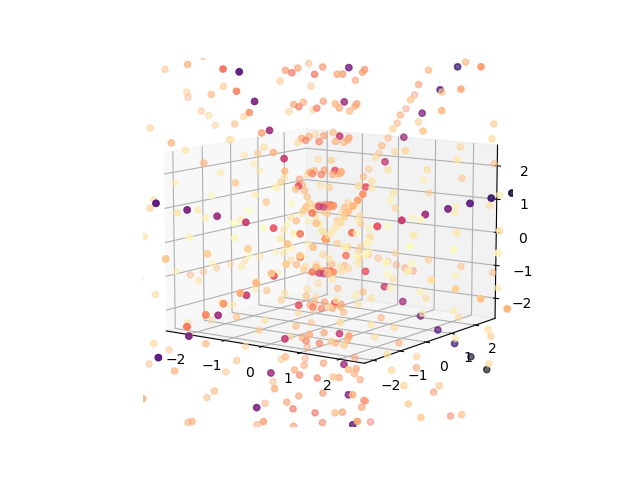

In [86]:
probs = np.log(probs)
#initial plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#creating a mesh with x, y values
plot = [ax.scatter(cartCoords[:,0], cartCoords[:,1], cartCoords[:,2], c=probs, cmap = 'magma')]

#running the animation
ani = FuncAnimation(fig, update, fargs=(sphericalCoords, probs, plot), interval=100, frames=360)

In [87]:
ani.save('starkEffect.gif', fps=60)

MovieWriter ffmpeg unavailable; using Pillow instead.
